# Visualización de datos



Para visualización usaremos el módulo **maplotlib.pyplot**. En este módulo trabajaremos en todo momento con una *figura* y unos *ejes*. En general, usaremos las funciones que usemos crearán nuevas figuras (y los ejes asociados) y cambiarán el foco del módulo a ellas. Si estamos interesados en volver a utilizar estas figuras podemos guardarlas en variables y cambiar el foco de nuevo posteriormente. Así, tenemos la clase 

In [1]:
from xlrd import open_workbook
import matplotlib.pyplot as plt
import numpy as np
ruta_datos = "../../data/Cap 8/parosexoedadprov.xls"

En primer lugar mostramos algunos ejemplos sencillos con la función plot:

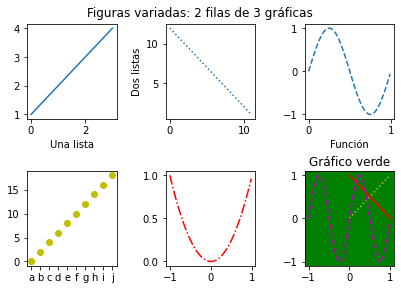

In [3]:
fig, [[arriba_iz, arriba_cnt, arriba_dr], [abajo_iz, abajo_cnt, abajo_dr]] = plt.subplots(2,3)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.55,
                    wspace=0.55)
plt.suptitle('Figuras variadas: 2 filas de 3 gráficas')
plt.sca(arriba_iz)
plt.plot([1,2,3,4])
plt.xlabel('Una lista')
#print(plt.xticks())
plt.sca(arriba_cnt)
plt.plot(range(12), range(12, 0, -1), linestyle='dotted')
plt.ylabel('Dos listas')
x = np.arange(0.0, 1.0, 0.01)
plt.sca(arriba_dr)
plt.plot(x, np.sin(2*np.pi*x), linestyle='dashed')
plt.xlabel('Función')
plt.sca(abajo_iz)
plt.plot(range(10), range(0,20,2), 'yo')
plt.xticks(range(10), ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
plt.sca(abajo_cnt)
x = np.arange(-1.0, 1.0, 0.02)
plt.plot(x, x**2, 'r',linestyle='dashdot')
plt.subplot(236, facecolor='g')
plt.plot([0,1], "y:", [1,0], "r", x, np.sin(2*np.pi*x), "m--")
plt.title('Gráfico verde')
plt.savefig("figuras_variadas")
plt.show()

In [4]:
def busca_ciudad(ciudad, ruta):
    libro = open_workbook(ruta)
    hoja = libro.sheet_by_index(0)
    encontrada = False
    i = 8
    res = -1
    while not encontrada and i < 70:
        if hoja.cell(i,1).value == ciudad:
            encontrada = True
            res = i
        i = i + 1
    return res
def calcula_estadisticas(ciudad, ruta, mujeres):
    libro = open_workbook(ruta)
    hoja = libro.sheet_by_index(0)
    sexo = "MUJERES"
    correccion = 1
    if not mujeres:
        sexo = "HOMBRES"
        correccion = 0
    fila = busca_ciudad(ciudad, ruta)
    col = 5
    edad = 6
    cat = 7
    etiquetas = []
    valores = []
    total = 0
    while col < 13:
        if hoja.cell(cat, col).value == sexo:
            etq = hoja.cell(edad, col - correccion).value
            valor = hoja.cell(fila, col).value
            etiquetas.append(etq)
            valores.append(valor)
            total = total + valor
        col = col + 1
    return valores, etiquetas

In [5]:
calcula_estadisticas("ALMERIA", ruta_datos, True)

([2435.0, 3744.0, 12567.0, 13774.0],
 ['MENORES DE 25 AÑOS',
  'DE 25 A 29 AÑOS',
  'DE 30 A 44 AÑOS',
  'MAYORES DE 45 AÑOS'])

Por simplicidad suponemos que encontramos la ciudad.

In [6]:
def paro_edades_tarta(ciudad, ruta, mujeres=True):
    vals, etqs = calcula_estadisticas(ciudad, ruta, mujeres)
    
    explode = (0, 0, 0, 0.1)  

    fig, ejes = plt.subplots()
    patches, text_cat, text_porc = ejes.pie(vals, explode=explode, labels=etqs, autopct='%1.1f%%', shadow=True, startangle=90)
    ejes.axis('equal')
    plt.legend(patches, etqs, loc="best")
    plt.savefig("tarta")
    plt.show()

Llamaremos a la función con la ciudad deseada para obtener el diagrama correspondiente:

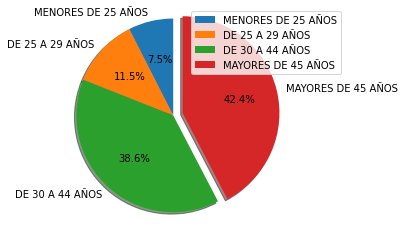

In [7]:
paro_edades_tarta("ALMERIA", ruta_datos)

Pasamos ahora a dibujar un diagrama de cajas. Para ello en primer lugar recopilamos porcentajes de paro por segmento de población y provincia:

In [9]:
def datos_provincia_porcentajes(ruta):
    libro = open_workbook(ruta)
    hoja = libro.sheet_by_index(0)
    # Evitamos coger datos de comunidades, solo de provincias
    # Sí cogemos las comunidades con una sola provincia, ya que no se hacen distinciones
    comunidades = [16, 20, 25, 32, 42, 47, 51, 54, 59, 66]
    etiquetas = [hoja.cell(6,5).value, hoja.cell(6,7).value, hoja.cell(6,9).value, hoja.cell(6,11).value]
    totales = [[], [], [], []]
    for i in range(8, 71):
        if comunidades.count(i) == 0:
            total = hoja.cell(i,2).value
            menores = ((hoja.cell(i,5).value + hoja.cell(i,6).value) * 100) / total
            m25_29 = ((hoja.cell(i,7).value + hoja.cell(i,8).value) * 100) / total
            m30_44 = ((hoja.cell(i,9).value + hoja.cell(i,10).value) * 100) / total
            mayores = ((hoja.cell(i,11).value + hoja.cell(i,12).value) * 100) / total
            totales[0].append(menores)
            totales[1].append(m25_29)
            totales[2].append(m30_44)
            totales[3].append(mayores)
    return totales

Así, obtenemos una lista de 4 listas. Cada una de estas listas contiene datos para un tramo de población para todas las provincias:

In [10]:
datos_provincia_porcentajes(ruta_datos)

[[8.286365271615301,
  8.272979612672685,
  10.053396183704177,
  9.399532223328624,
  8.419951764027918,
  10.762609937608058,
  8.407994927921408,
  8.64999828983822,
  10.745762711864407,
  10.705842620736238,
  9.562209884408848,
  6.9824732479663325,
  13.033444380339096,
  6.581513874032593,
  6.094598944565291,
  7.039697730492928,
  9.139413888299002,
  10.73787507076807,
  8.709308966304969,
  8.255480246687428,
  9.277752146801006,
  8.188625139397802,
  7.590874905991477,
  7.884580594584816,
  9.569377990430622,
  8.29913542372206,
  8.86419434035405,
  9.58694543600204,
  8.794260587826892,
  7.241591153432652,
  6.714651417932777,
  7.946934569809376,
  7.269049224544841,
  8.051445389670604,
  6.850828015604413,
  8.876874782002092,
  7.6784636720693635,
  10.709879082010364,
  10.416064341472389,
  4.890815408522124,
  5.399113082039912,
  5.490020407147479,
  4.705882352941177,
  7.6934411434254875,
  10.160408110646605,
  9.175717070453912,
  6.5292937203269545,
  5.5

Con estos datos podemos crear fácilmente un diagrama de caja:

In [11]:
def diagrama_caja(ruta):
    totales = datos_provincia_porcentajes(ruta)
    plt.subplots()
    etqs = ["Menores 25", "25-29", "30-44", "Mayores 45"]
    plt.boxplot(totales, labels=etqs)
    plt.savefig("cajas")
    plt.show()

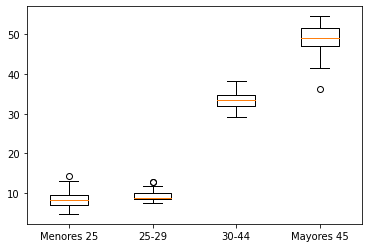

In [12]:
diagrama_caja(ruta_datos)

Pasamos ahora a generar diagramas de barras. Para ello, en primer lugar obtenemos datos para un conjunto de ciudades pasado como parámetro:

In [13]:
def datos_ciudades(ruta, ciudades):
    libro = open_workbook(ruta)
    hoja = libro.sheet_by_index(0)
    resultados = []
    etqs = []
    for i in range(8, 71):
        if hoja.cell(i,1).value in ciudades:
            resultados.append(hoja.cell(i,2).value)
            etqs.append(hoja.cell(i,1).value)
    return etqs, resultados

In [14]:
datos_ciudades(ruta_datos, ["COM. DE MADRID", "BARCELONA", "VALENCIA", "TERUEL"])

(['TERUEL', 'BARCELONA', 'VALENCIA', 'COM. DE MADRID'],
 [5922.0, 300790.0, 188918.0, 380051.0])

A partir de estos datos es sencillo dibujar un diagrama de barras simple:

In [15]:
def barras_ciudades(ruta, ciudades):
    etqs, datos = datos_ciudades(ruta, ciudades)

    ind = np.arange(4)  # índices para las X
    ancho = 0.35        # Ancho de las barras
    
    fig, eje = plt.subplots()
    barras = eje.bar(ind, datos, ancho, color='g', tick_label=etqs)

    plt.ylabel('Cantidad')
    plt.tight_layout()

    plt.savefig("barras1")
    plt.show()
    

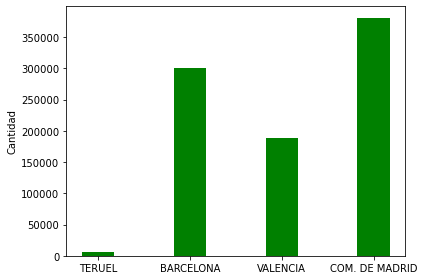

In [16]:
barras_ciudades(ruta_datos, ["COM. DE MADRID", "BARCELONA", "VALENCIA", "TERUEL"])

Sin embargo, es posible complicar este diagrama. Por ejemplo, podemos comparar el paro entre hombres y mujeres por tramo de edad. Para ello, primero calculamos el total de parados en todas las provincias:

In [17]:
def datos_provincia_totales(ruta):
    libro = open_workbook(ruta)
    hoja = libro.sheet_by_index(0)
    # Evitamos coger datos de comunidades, solo de provincias
    # Sí cogemos las comunidades con una sola provincia, ya que no se hacen distinciones
    comunidades = [16, 20, 25, 32, 42, 47, 51, 54, 59, 66]
    etiquetas = [hoja.cell(6,5).value, hoja.cell(6,7).value, hoja.cell(6,9).value, hoja.cell(6,11).value]
    totalesH = [0, 0, 0, 0]
    totalesM = [0, 0, 0, 0]
    for i in range(8, 71):
        if comunidades.count(i) == 0:
            for j in range(8):
                if j % 2 == 0:
                    totalesH[j // 2] = totalesH[j // 2] + hoja.cell(i,5 + j).value
                else:
                    totalesM[j // 2] = totalesM[j // 2] + hoja.cell(i,5 + j).value
    return totalesH, totalesM

A continuación, manipulamos las posiciones para que las barras estén juntas. Además, cambiamos el color para comparar más fácilmente.

In [18]:
def totales_barras(ruta):
    hom, muj = datos_provincia_totales(ruta)
    
    ind = np.arange(4)  # índices para las X
    ancho = 0.35        # Ancho de las barras

    fig, eje = plt.subplots()
    etqs = ["Menores 25", "25-29", "30-44", "Mayores 45"]
    barrasH = eje.bar(ind, hom, ancho, color='b')
    barrasM = eje.bar(ind + ancho, muj, ancho, color='y', tick_label=etqs)

    plt.ylabel('Cantidad')

    plt.legend((barrasH[0], barrasM[0]), ('Hombres', 'Mujeres'))
    
    plt.tight_layout()

    plt.savefig("barras2")
    plt.show()

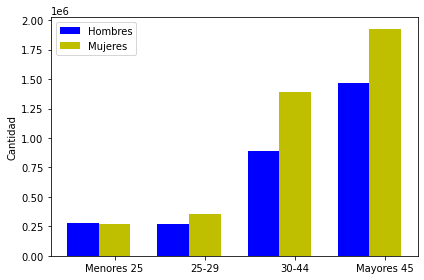

In [19]:
totales_barras(ruta_datos)

En el diagrama anterior perdemos información sobre el total por tramos de edad. Para verlo más fácilmente podemos "apilar" las barras, como mostramos a continuación:

In [20]:
def totales_barras_pila(ruta):
    hom, muj = datos_provincia_totales(ruta)
    
    ind = np.arange(4)  # índices para las X
    ancho = 0.35        # Ancho de las barras

    fig, eje = plt.subplots()
    etqs = ["Menores 25", "25-29", "30-44", "Mayores 45"]
    barrasH = eje.bar(ind, hom, ancho, color='b')
    barrasM = eje.bar(ind, muj, ancho, bottom=hom, color='y', tick_label=etqs)

    plt.ylabel('Cantidad')

    plt.legend((barrasH[0], barrasM[0]), ('Hombres', 'Mujeres'))
    
    plt.tight_layout()

    plt.savefig("barras3")
    plt.show()

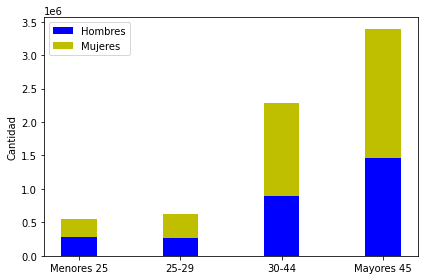

In [21]:
totales_barras_pila(ruta_datos)

Por último mostramos cómo crear un histograma. Para ello, cogemos datos totales en un solo tramo de edad:

In [22]:
def porcentajes_edad(ruta, tramo):
    libro = open_workbook(ruta)
    hoja = libro.sheet_by_index(0)
    # Evitamos coger datos de comunidades, solo de provincias
    # Sí cogemos las comunidades con una sola provincia, ya que no se hacen distinciones
    comunidades = [16, 20, 25, 32, 42, 47, 51, 54, 59, 66]
    totales = []
    for i in range(8, 71):
        if i not in comunidades:
            total = hoja.cell(i, 2).value
            total_tramo = hoja.cell(i,5 + (tramo * 2)).value + hoja.cell(i,5 + (tramo * 2) + 1).value
            porcent = (100 * total_tramo) / total
            totales.append(porcent)
    return totales    

In [23]:
porcentajes_edad(ruta_datos, 0)

[8.286365271615301,
 8.272979612672685,
 10.053396183704177,
 9.399532223328624,
 8.419951764027918,
 10.762609937608058,
 8.407994927921408,
 8.64999828983822,
 10.745762711864407,
 10.705842620736238,
 9.562209884408848,
 6.9824732479663325,
 13.033444380339096,
 6.581513874032593,
 6.094598944565291,
 7.039697730492928,
 9.139413888299002,
 10.73787507076807,
 8.709308966304969,
 8.255480246687428,
 9.277752146801006,
 8.188625139397802,
 7.590874905991477,
 7.884580594584816,
 9.569377990430622,
 8.29913542372206,
 8.86419434035405,
 9.58694543600204,
 8.794260587826892,
 7.241591153432652,
 6.714651417932777,
 7.946934569809376,
 7.269049224544841,
 8.051445389670604,
 6.850828015604413,
 8.876874782002092,
 7.6784636720693635,
 10.709879082010364,
 10.416064341472389,
 4.890815408522124,
 5.399113082039912,
 5.490020407147479,
 4.705882352941177,
 7.6934411434254875,
 10.160408110646605,
 9.175717070453912,
 6.5292937203269545,
 5.573417618048555,
 6.192433470342924,
 6.585010207

In [24]:
def string_tramo(tramo):
    if tramo == 0:
        msj = "menores de 25"
    elif tramo == 1:
        msj = "entre 25 y 29"
    elif tramo == 2:
        msj = "entre 30 y 44"
    else:
        msj = "mayores de 45"
    return msj

def histograma_tramo(ruta, tramo):
    l = porcentajes_edad(ruta, tramo)

    plt.subplots()
    plt.hist(l)
    
    msj = string_tramo(tramo)
    plt.xlabel('Porcentaje de parados')
    plt.ylabel('Porcentaje de ciudades con ese paro')
    plt.title('Porcentajes de paro en el tramo ' + msj)
    
    plt.savefig("histograma")
    plt.show()

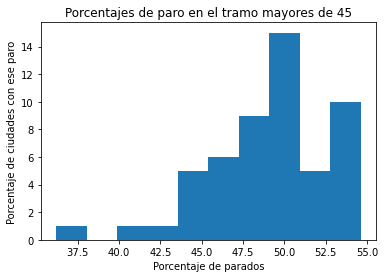

In [25]:
histograma_tramo(ruta_datos, 3)